In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("mnist_train.csv")
X_train = df.iloc[:,1:]
y_train = df.iloc[:, 0]
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [12]:
dft = pd.read_csv("mnist_test.csv")
X_test = dft.iloc[:, 1:]
y_test = dft.iloc[:, 0]
print(X_test.shape, y_test.shape)

(10000, 784) (10000,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
y_pred = dt.predict(X_test)
print(f"Accuracy with dtree : {accuracy_score(y_test, y_pred)}")

Accuracy with dtree : 0.8771


In [63]:
rf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_samples=0.3, max_features=0.4, random_state=43, bootstrap=True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.4, max_samples=0.3, n_estimators=500,
                       n_jobs=5, random_state=43)

In [66]:
y_pred2 = rf.predict(X_test)
print(f"Accuracy with Rf : {accuracy_score(y_test, y_pred2)}")

Accuracy with Rf : 0.9597


In [ ]:
#Accuracy with Rf : 0.9345

In [20]:
import numpy as np
import tkinter as tk
from tkinter import Canvas
from PIL import Image, ImageDraw, ImageOps
import cv2
import joblib  # To load the trained model

In [21]:
WIDTH, HEIGHT = 280, 280  # Large canvas size for better drawing
BG_COLOR = "black"
FG_COLOR = "white"

In [67]:
class DigitRecognizerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Draw a Digit")

        # Create Canvas for Drawing
        self.canvas = Canvas(root, width=WIDTH, height=HEIGHT, bg=BG_COLOR)
        self.canvas.pack()

        # Buttons
        self.btn_predict = tk.Button(root, text="Predict", command=self.predict_digit)
        self.btn_predict.pack()
        self.btn_clear = tk.Button(root, text="Clear", command=self.clear_canvas)
        self.btn_clear.pack()

        # Bind Mouse Events
        self.canvas.bind("<B1-Motion>", self.draw)

        # Image setup
        self.image = Image.new("L", (WIDTH, HEIGHT), 0)  # Grayscale image
        self.draw = ImageDraw.Draw(self.image)

    def draw(self, event):
        """Draw on canvas"""
        x, y = event.x, event.y
        radius = 10  # Thickness of brush
        self.canvas.create_oval(
            x - radius,
            y - radius,
            x + radius,
            y + radius,
            fill=FG_COLOR,
            outline=FG_COLOR,
        )
        self.draw.ellipse([x - radius, y - radius, x + radius, y + radius], fill=255)

    def preprocess_image(self):
        """Convert canvas drawing to 28x28 grayscale matrix"""
        img = self.image.resize((28, 28))  # Resize to MNIST size
        img = ImageOps.invert(img)  # Invert colors (black background, white digit)
        img = img.convert("L")  # Convert to grayscale
        img_array = np.array(img)  # Convert to numpy array
        img_array = img_array.flatten() / 255.0  # Normalize pixel values (0-1)
        return img_array.reshape(1, -1)  # Reshape for model input

    def predict_digit(self):
        """Predict digit using trained Random Forest model"""
        img_array = self.preprocess_image()
        prediction = dt.predict(img_array)
        print(f"Predicted Digit: {prediction[0]}")

    def clear_canvas(self):
        """Clear the canvas for a new drawing"""
        self.canvas.delete("all")
        self.image = Image.new("L", (WIDTH, HEIGHT), 0)
        self.draw = ImageDraw.Draw(self.image)

In [68]:
root = tk.Tk()
app = DigitRecognizerApp(root)
root.mainloop()


c:\Users\nithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Predicted Digit: 9


c:\Users\nithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Predicted Digit: 4


c:\Users\nithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Predicted Digit: 5


c:\Users\nithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Predicted Digit: 5


c:\Users\nithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Predicted Digit: 9


In [32]:
import matplotlib.pyplot as plt


def display_image_from_row(pixel_row):
    """
    Display an image from a flattened row of 784 pixels (MNIST format).

    Args:
        pixel_row (array-like): A 1D array of 784 values representing grayscale pixel intensities.
    """
    if len(pixel_row) != 784:
        raise ValueError("Input must be a flattened array of 784 values (28x28).")

    image = np.array(pixel_row).reshape(28, 28)  # Reshape to 28x28
    plt.imshow(image, cmap="gray")  # Display as grayscale
    plt.axis("off")  # Hide axes
    plt.show()

{'Output: 4'}


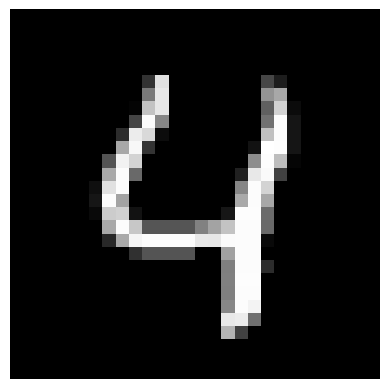

In [38]:
row = 4
inputs = X_test.iloc[row]
print({f"Output: {y_test.iloc[row]}"})
display_image_from_row(inputs)

In [69]:
import numpy as np
from PIL import Image, ImageOps


def image_to_row(image_path):
    """
    Convert a given image to a flattened row (784 values) for ML model input.

    Args:
        image_path (str): Path to the image file.

    Returns:
        np.array: A 1D numpy array of 784 pixel values (normalized 0-1).
    """
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    img = ImageOps.invert(img)  # Ensure white digit on black background
    img = img.resize((28, 28))  # Resize to 28x28 (if not already)

    img_array = np.array(img)  # Convert to numpy array
    img_array = img_array.flatten() / 255.0  # Normalize pixel values (0-1)

    return img_array  # Returns 1D array of 784 values


# Example Usage:
row = image_to_row("../4m.png")
print(row.shape)  # Output: (784,)
row = row.reshape(1,-1)
print(row.shape)  # Output: (784,)

rf.predict(X_test.iloc[4].values.reshape(1,-1))
rf.predict(row)

(784,)
(1, 784)


c:\Users\nithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\nithi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=int64)